In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [50]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Position_Salaries (1).csv")

In [51]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [65]:
X = df[['Level']].values
y = df['Salary'].values


In [66]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

In [67]:
svr = SVR(kernel='rbf')
svr.fit(X_scaled, y_scaled)

SVR()

In [69]:
y_pred_scaled = svr.predict(X_scaled)
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

In [70]:
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20036494264.13176


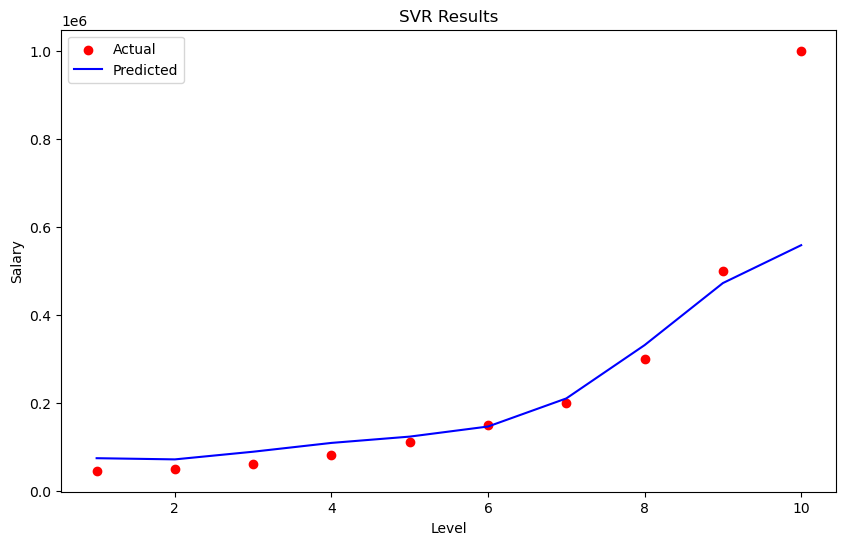

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X, y_pred, color='blue', label='Predicted')
plt.title('SVR Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()